# Using K-means Clustering to categorize the data

## Elbow method to determine optimum number of clusters

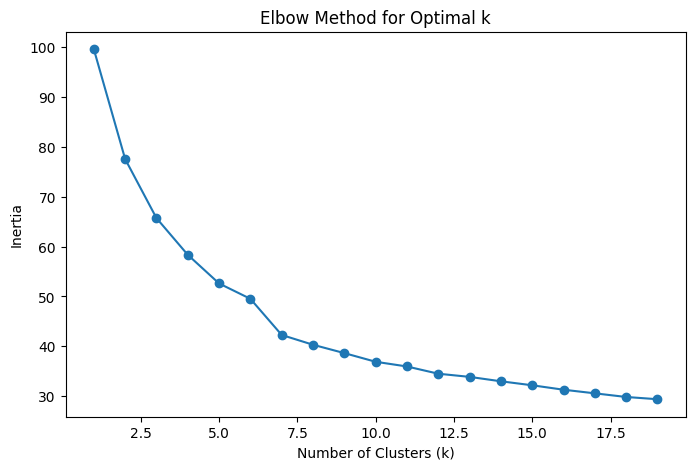

In [3]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import pandas as pd

# Load the data
data = pd.read_csv('yeast_train.csv')

# Select numeric features for clustering
X = data.iloc[:, 1:]

# Find the optimal number of clusters using the Elbow method
inertia = []
k_range = range(1, 20)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


# Plot between different Scores and Number of Clusters(K)

## Silhoutte score vs K (Higher is better)

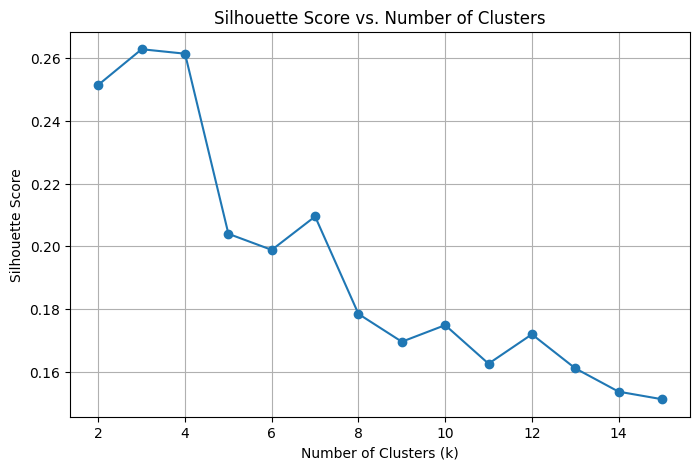

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load the data
data = pd.read_csv('yeast_train.csv')  # Update filename if needed

# Select numeric features for clustering
X = data.iloc[:, 1:]

# Store silhouette scores
silhouette_scores = []

# Try k values from 2 to 15 (silhouette score is not defined for k=1)
k_range = range(2, 16)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.grid(True)
plt.show()


## Calinski-Harabasz score vs K (Higher is better)

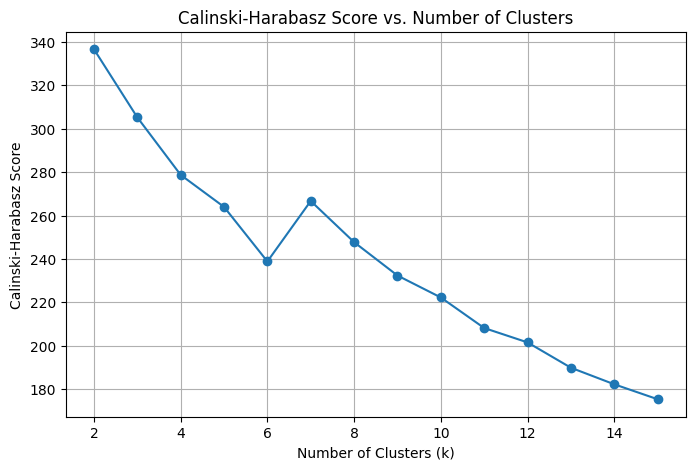

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score

# Load the data
data = pd.read_csv('yeast_train.csv')  # Update filename if needed

# Select numeric features for clustering
X = data.iloc[:, 1:]

# Store Calinski-Harabasz scores
calinski_scores = []

# Try k values from 2 to 15
k_range = range(2, 16)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = calinski_harabasz_score(X, labels)
    calinski_scores.append(score)

# Plot Calinski-Harabasz scores
plt.figure(figsize=(8, 5))
plt.plot(k_range, calinski_scores, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Calinski-Harabasz Score')
plt.title('Calinski-Harabasz Score vs. Number of Clusters')
plt.grid(True)
plt.show()


## Davies-Bouldin Score vs K (Lower is better)

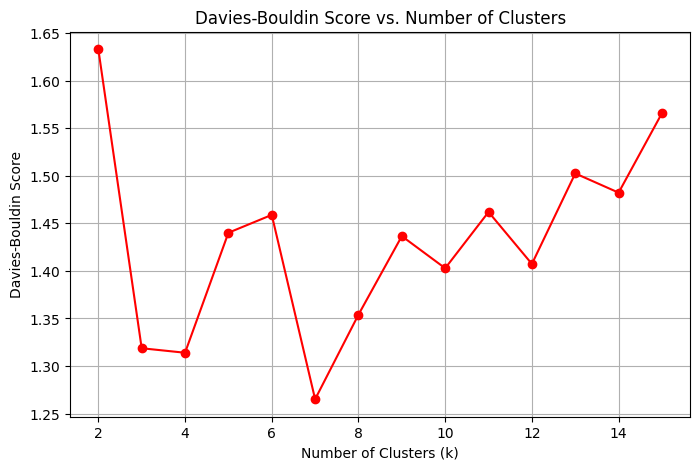

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

# Load the data
data = pd.read_csv('yeast_train.csv')  # Update filename if needed

# Select numeric features for clustering
X = data.iloc[:, 1:]

# Store Davies-Bouldin scores
davies_scores = []

# Try k values from 2 to 15
k_range = range(2, 16)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = davies_bouldin_score(X, labels)
    davies_scores.append(score)

# Plot Davies-Bouldin scores
plt.figure(figsize=(8, 5))
plt.plot(k_range, davies_scores, marker='o', linestyle='-', color='red')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies-Bouldin Score')
plt.title('Davies-Bouldin Score vs. Number of Clusters')
plt.grid(True)
plt.show()


             Silhouette Score  Calinski_Harabasz Score  Davies-Bouldin Score
chebyshev            0.162503               263.434634              1.711454
hamming             -0.095833                14.932265             10.257726
mahalanobis          0.071163               133.801574              2.131994
euclidean            0.184394               277.345475              1.531214
manhattan            0.157048               217.796737              1.606366
cosine               0.137094               236.196839              1.533836
Best Silhouette score is for: euclidean
Best Calinski-Harabasz score is for: euclidean
Best Davies-Bouldin score is for: euclidean


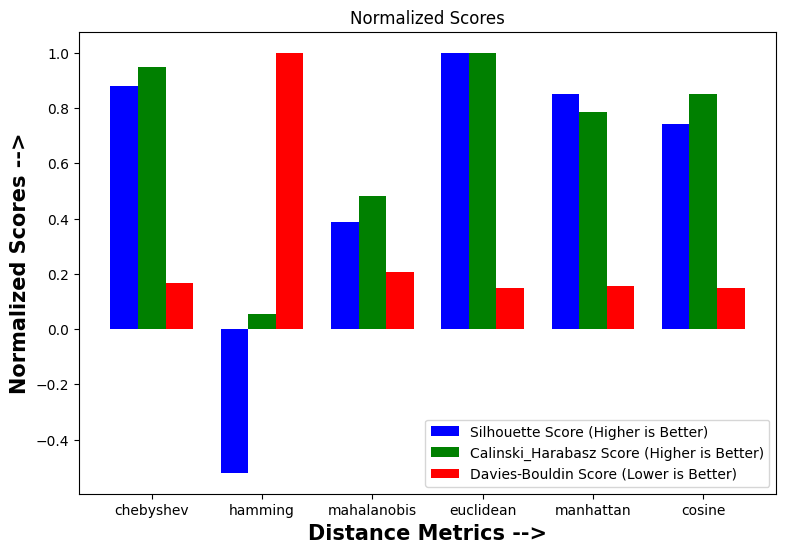

In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, pairwise_distances
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('yeast_train.csv')


# Select numeric features for clustering
X = data.iloc[:, 1:]

silhouetteList = []
calinski_harabaszList = []
davies_bouldinList = []

distances = ['chebyshev', 'hamming', 'mahalanobis', 'euclidean', 'manhattan', 'cosine']
for i in distances:
  customX = pairwise_distances(X, metric=i)
  # Apply K-means clustering with k=7
  kmeans = KMeans(n_clusters=7, random_state = 1234, algorithm='elkan')
  data['Cluster'] = kmeans.fit_predict(X)

  # Calculate evaluation metrics
  silhouette = silhouette_score(customX, data['Cluster'])
  calinski_harabasz = calinski_harabasz_score(customX, data['Cluster'])
  davies_bouldin = davies_bouldin_score(customX, data['Cluster'])

  silhouetteList.append(silhouette)
  calinski_harabaszList.append(calinski_harabasz)
  davies_bouldinList.append(davies_bouldin)


fig = plt.subplots(figsize =(9, 6))
scoreDF = pd.DataFrame(np.array([silhouetteList, calinski_harabaszList, davies_bouldinList]).T, columns=["Silhouette Score", "Calinski_Harabasz Score", "Davies-Bouldin Score"], index=distances)
print(scoreDF)
plt.bar([0,1,2,3,4,5], np.array(silhouetteList)/max(silhouetteList), width = 0.25, label='Silhouette Score (Higher is Better)', color='b')
plt.bar([0.25,1.25,2.25,3.25,4.25,5.25], np.array(calinski_harabaszList)/max(calinski_harabaszList), width=0.25, label="Calinski_Harabasz Score (Higher is Better)", color='g')
plt.bar([0.5,1.5,2.5,3.5,4.5,5.5], np.array(davies_bouldinList)/max(davies_bouldinList), width=0.25, label="Davies-Bouldin Score (Lower is Better)", color='r')

plt.xticks(ticks = [0.25,1.25,2.25,3.25,4.25,5.25], labels=distances)
plt.title("Normalized Scores")
plt.ylabel("Normalized Scores -->", fontweight='bold', fontsize=15)
plt.xlabel("Distance Metrics -->", fontweight='bold', fontsize=15)
print("Best Silhouette score is for:", distances[silhouetteList.index(max(silhouetteList))])
print("Best Calinski-Harabasz score is for:", distances[calinski_harabaszList.index(max(calinski_harabaszList))])
print("Best Davies-Bouldin score is for:", distances[davies_bouldinList.index(min(davies_bouldinList))])
plt.legend()

### Optimum number of clusters : All the above calculations with respect to K suggest that the number of clusters should be 7. Elbow method did not give any substantial help in deciding for the optimum clusters. However the plots with different scores suggested that 7 should be the optimum number of clusters. Also euclidean is the best distance metric among all the metric available

## Exporting the model




### Generally K-means model are exported in .pkl format.

In [5]:
import joblib
from sklearn.cluster import KMeans

# Assuming you have already trained your model
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(X)  # Train on your dataset

# Save model
joblib.dump(kmeans, "kmeans_model.pkl")  # OR use .joblib instead of .pkl


['kmeans_model.pkl']